# Visualise eQTLs in MS data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dat_dir = "/usersdata/yuanhua/msNewData/fromMarc/CorrectedExpression/"
_file = "expr_csf.vst_Log_counts.2CellMin.annoV33.CD4+_T_cell."
_suffix = "ProbesWithZeroVarianceRemoved.CovariatesRemovedOLS.txt.gz"

dat = pd.read_csv(dat_dir + _file + _suffix, sep='\t', index_col=0)

In [3]:
dat

,S14618-G1;TU0531_CSF_S14618-G1;0,S14764-C3;TU0547_CSF_S14764-C3;1,S15844-F8;TU0594_CSF_S15844-F8;2,S14962-A4;TU0553_CSF_S14962-A4;3,S15406-A2;TU0584_CSF_S15406-A2;4,S14618-C1;TU0535_CSF_S14618-C1;6,S14962-F4;TU0559_CSF_S14962-F4;7,S16803-E5;TU0606_CSF_S16803-E5;8,S16802-B4;TU0609_CSF_S16802-B4;9,S16899-H2;TU0628_CSF_S16899-H2;10,...,S15924-E1;TU0607_CSF_S15924-E1;70,STU629-E3;TU0629_CSF_STU629-E3;73,S15924-F3;TU0605_CSF_S15924-F3;75,S14962-E4;TU0558_CSF_S14962-E4;76,S14076-H7;TU0523_CSF_S14076-H7;77,S14615-A1;TU0551_CSF_S14615-A1;78,S14097-A9;TU0529_CSF_S14097-A9;79,S14619-G3;TU0550_CSF_S14619-G3;80,S14092-H2;TU0527_CSF_S14092-H2;81,S14619-H3;TU0548_CSF_S14619-H3;83
-,,,,,,,,,,,,,,,,,,,,,
AL627309.1,-7.480898e-04,-0.000840,-0.000410,0.004124,-0.001324,2.447723e-03,-0.000397,-0.000483,0.000509,0.000687,...,-0.000233,-0.000093,-0.000621,-0.000572,-0.000852,-0.000074,0.003423,-0.000680,0.002144,-0.000310
AL669831.5,-1.073147e-02,0.002435,-0.003768,0.003195,0.009909,-6.524457e-03,0.014727,-0.001166,-0.000542,0.001723,...,0.001953,-0.001095,-0.014325,-0.004574,0.008073,-0.002192,0.000641,-0.005884,0.000565,0.011996
FAM87B,2.125825e-05,0.000015,-0.000009,-0.000011,-0.000041,-6.799886e-07,0.000012,-0.000017,-0.000009,-0.000002,...,0.000015,0.000021,0.000021,-0.000046,-0.000010,-0.000024,-0.000004,-0.000007,-0.000024,0.000021
LINC00115,-6.478642e-03,-0.003613,0.004980,-0.001108,-0.003764,-2.662151e-04,0.027584,0.001667,-0.000056,0.002948,...,0.010051,-0.002235,-0.006234,0.009596,0.004449,0.001908,-0.001379,0.009431,0.001585,0.004829
FAM41C,-1.039621e-02,-0.005404,-0.005210,-0.002224,-0.006224,3.258804e-03,-0.003924,-0.004135,0.005983,0.001773,...,0.007005,0.003561,-0.014105,-0.008461,-0.009096,0.000487,-0.000862,-0.000697,-0.002379,-0.001882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC007325.4,-7.859185e-03,0.000886,0.003437,0.004592,-0.000083,-7.362980e-03,0.008120,-0.003470,-0.002113,0.001639,...,0.003560,-0.002539,-0.008140,0.006919,-0.001521,0.002513,0.000116,-0.001276,-0.001010,-0.005050
AL354822.1,-1.668377e-02,0.016087,-0.006080,0.004250,0.003757,-6.674777e-03,-0.005927,-0.003340,0.000621,-0.004456,...,-0.001969,-0.005690,-0.003290,-0.005756,-0.000776,-0.006138,-0.006522,-0.006518,0.003052,0.007518
AC004556.1,1.832320e-02,-0.042761,-0.030379,-0.028352,0.059230,3.040367e-02,-0.046519,0.009566,0.036072,0.040829,...,-0.022602,-0.007086,0.105224,-0.035245,-0.012157,-0.011960,0.024171,-0.028655,-0.036289,-0.044851


In [4]:
df_fdr = pd.read_csv(dat_dir + '../HeatmapInformation/SigColocFdr.txt', sep='\t')
# df_fdr

In [5]:
df_fdr.columns

Index(['B_cell', 'CD4+_T_cell', 'CD4+_Treg_cell', 'CD8+_gd_T_cell',
       'CD8+_T_cell', 'cDC2', 'Macrophage', 'MALAT1Low_myeloid_cell',
       'Monocyte', 'NK_cell', 'pDC'],
      dtype='object')

In [6]:
df_fdr.index = ['-'.join(x.split('-')[1:]) for x in df_fdr.index]
# df_fdr.rename(columns={'Macrophage': 'macrophage'}, errors="raise")

df_fdr

,B_cell,CD4+_T_cell,CD4+_Treg_cell,CD8+_gd_T_cell,CD8+_T_cell,cDC2,Macrophage,MALAT1Low_myeloid_cell,Monocyte,NK_cell,pDC
AHI1,0.361436,1.025205e-03,0.145146,0.490220,5.361172e-02,8.984803e-02,9.484946e-01,8.760951e-01,2.629064e-01,0.348963,6.975246e-01
HLA-DQB1,0.000858,6.075174e-03,0.343228,0.216168,1.484594e-07,6.725315e-05,NaN,5.856937e-02,3.027285e-01,0.641055,3.284498e-02
AIF1,0.842590,2.509557e-03,0.568546,0.798034,3.861848e-09,5.904924e-01,5.235176e-01,3.969303e-01,9.813594e-01,0.001103,8.571882e-01
ORMDL3,0.206558,7.981869e-04,0.133548,0.358894,6.926391e-05,7.815259e-01,3.700149e-01,4.828632e-01,1.237721e-01,0.521421,1.089939e-01
ZC3HAV1,0.461224,1.053258e-10,0.000322,0.207097,1.374096e-04,1.709413e-01,2.676756e-01,4.580288e-01,3.264381e-01,0.013678,4.607126e-01
CLECL1,0.040202,1.242588e-04,0.048150,0.003349,5.234030e-13,1.390071e-07,1.682631e-05,1.962343e-03,1.912661e-05,0.513192,1.383709e-04
HLA-DRB5,0.000004,9.044918e-04,0.004651,0.050837,1.196810e-03,7.109725e-07,3.355294e-05,3.788224e-08,2.510775e-07,0.000887,1.272521e-12
HLA-DQA2,0.000011,6.595753e-05,0.001136,0.244447,5.283081e-11,9.277593e-08,1.070450e-10,5.284776e-09,7.305745e-05,0.012007,1.587728e-13
IFITM2,0.346322,3.538264e-05,0.123221,0.011450,3.410461e-06,8.279950e-01,4.932241e-01,7.576710e-01,3.136639e-02,0.094491,3.501619e-01


### Compact loading gene expression

In [7]:
def load_GEX(cell_type='CD4+_T_cell'):
    dat_dir = "/usersdata/yuanhua/msNewData/fromMarc/CorrectedExpression/"
    _file = "expr_csf.vst_Log_counts.2CellMin.annoV33."
    _suffix = ".ProbesWithZeroVarianceRemoved.CovariatesRemovedOLS.txt.gz"
    
    dat = pd.read_csv(dat_dir + _file + cell_type + _suffix, sep='\t', index_col=0)
    
    dat_del = dat.copy()
    
    if cell_type == 'macrophage':
        dat_del.rename(columns={"S16961-F5;TU0626_CSF_S16961-F5;58": 
                                "S16803-G12;TU0626_CSF_S16803-G12;13"}
                      )
    else:
        dat_del['S16803-G12;TU0626_CSF_S16803-G12;13'] = (
            dat_del['S16803-G12;TU0626_CSF_S16803-G12;13'] +
            dat_del['S16961-F5;TU0626_CSF_S16961-F5;58']
        ) / 2

    dat_del = dat_del.drop('S16961-F5;TU0626_CSF_S16961-F5;58', axis=1)
    donors = ['TU' + x.split(';')[1][3:6] for x in dat_del.columns]
    dat_del.columns = donors
    print(len(donors), len(dat_del.columns), len(np.unique(donors)))
    
    return dat_del

In [8]:
# _gene = 'AHI1'
# _cell = 'CD4_T'
# cell_type='CD4+_T_cell'

# _gene, _cell, cell_type = 'AHI1', 'CD4_T', 'CD4+_T_cell'
# _gene, _cell, cell_type = 'ZC3HAV1', 'CD4_T', 'CD4+_T_cell'

## not annotated from Maria
# _gene, _cell, cell_type = 'AIF1', 'CD8_T', 'CD8+_T_cell'
# _gene, _cell, cell_type = 'ORMDL3', 'CD8_T', 'CD8+_T_cell'
# _gene, _cell, cell_type = 'HLA-DQB1', 'CD8_T', 'CD8+_T_cell'

# _gene, _cell, cell_type = 'ZC3HAV1', 'CD8_T', 'CD8+_T_cell'
_gene, _cell, cell_type = 'CLECL1', 'CD8_T', 'CD8+_T_cell'
# _gene, _cell, cell_type = 'CLECL1', 'macrophage', 'macrophage'

# _gene, _cell, cell_type = 'IFITM2', 'CD8_T', 'CD8+_T_cell'

# _gene, _cell, cell_type = 'HLA-DRB5', 'pDC', 'pDC'
# _gene, _cell, cell_type = 'HLA-DQA2', 'pDC', 'pDC'

_fdr = df_fdr[cell_type[0].upper() + cell_type[1:]].loc[_gene]
# _fdr = df_fdr['Macrophage'].loc[_gene]
# _fdr = -1

print(_fdr)

dat_del = load_GEX(cell_type)

5.234029724948899e-13
80 80 80


In [9]:
dat_del

,TU531,TU547,TU594,TU553,TU584,TU535,TU559,TU606,TU609,TU628,...,TU607,TU629,TU605,TU558,TU523,TU551,TU529,TU550,TU527,TU548
-,,,,,,,,,,,,,,,,,,,,,
AL627309.1,-0.000433,-0.001525,-0.002441,0.009964,-0.000177,0.000433,-0.002014,-0.002643,-0.002556,0.001188,...,-0.003067,-0.003299,-0.004935,-0.001213,-0.001847,0.000446,-0.003161,-0.001414,0.004959,0.000952
AL669831.5,0.010624,0.003576,0.003339,0.018904,-0.006512,0.002676,-0.008262,-0.005943,0.005350,0.001852,...,0.002625,-0.004251,-0.004938,0.003732,-0.004289,0.002298,0.033252,-0.005668,0.000626,0.008599
FAM87B,-0.000102,-0.000073,0.000048,-0.000047,-0.000187,-0.000008,-0.000041,-0.000011,0.000034,-0.000069,...,0.000060,0.000177,0.000162,-0.000006,-0.000040,-0.000097,-0.000013,-0.000032,-0.000167,-0.000125
LINC00115,0.010080,-0.002989,-0.004422,-0.006399,-0.003680,-0.004864,-0.008719,0.003365,-0.000721,0.003882,...,-0.001663,-0.002828,-0.002895,-0.005028,-0.003613,0.001198,0.034672,0.013891,0.001514,-0.006970
FAM41C,-0.022648,0.000449,-0.011867,-0.005836,-0.003295,-0.010838,0.006041,-0.004929,0.003044,0.006064,...,0.012929,0.006143,0.001939,-0.013688,-0.013053,-0.006603,-0.003388,-0.010245,-0.002175,-0.020640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC007325.4,-0.016574,0.019799,-0.008803,-0.010700,0.000030,-0.026679,0.018605,-0.002695,-0.004080,-0.007750,...,-0.005122,-0.001955,-0.003380,0.000053,0.010992,-0.006064,-0.003218,-0.001552,-0.002270,-0.013363
AL354822.1,-0.006378,0.000805,-0.003900,0.006506,-0.001207,-0.003254,-0.004342,0.000243,-0.000249,-0.008905,...,-0.000243,-0.001278,0.000193,-0.003709,-0.003598,-0.002586,-0.003508,-0.006429,0.000609,0.009853
AC004556.1,-0.001522,-0.012605,-0.018664,-0.010213,0.040530,0.017641,-0.020121,-0.023991,0.027605,0.063062,...,-0.024909,-0.020878,0.034914,-0.015091,0.019930,-0.001201,0.062451,-0.027197,0.001947,-0.000035


## Load genotypes

In [10]:
import vireoSNP

gt_dir = '/usersdata/yuanhua/archiveEBI/msclerosis/gwas/'

gwas_df = pd.read_csv(gt_dir + 'MS_SNPgene_adds.txt', sep='\t')

gwas_df['snp'] = [str(gwas_df.Chr[i]) + '_' + str(gwas_df.HG19[i]) 
                  for i in range(gwas_df.shape[0])]

gwas_df.columns = ['Chr', 'snp_id', 'HG19', 'gene', 'Gene_ID', 'snp']

gwas_df

,Chr,snp_id,HG19,gene,Gene_ID,snp
0,1,rs3748817,2525665,AL139246.3,ENSG00000228037,1_2525665
1,1,rs3748817,2525665,AL139246.4,ENSG00000229393,1_2525665
2,1,rs3748817,2525665,AL139246.5,ENSG00000272449,1_2525665
3,1,rs3748817,2525665,AL831784.1,ENSG00000237058,1_2525665
4,1,rs3748817,2525665,FAM213B,ENSG00000157870,1_2525665
...,...,...,...,...,...,...
1005,17,.,38023745,ORMDL3,NaN,17_38023745
1006,6,.,31583155,AIF1,NaN,6_31583155
1007,6,.,32605884,HLA-DQB1,NaN,6_32605884
1008,6,.,32397309,HLA-DRB5,NaN,6_32397309


In [11]:
import vireoSNP

gt_dir = '/usersdata/yuanhua/archiveEBI/msclerosis/gwas/'

gwas_df = pd.read_csv(gt_dir + 'MS_SNPgene_MarcList.vcf', 
                      sep='\t', comment='#', header=None)

gwas_df = gwas_df[[0, 1, 6]]
gwas_df.columns = ['Chr', 'HG19', 'gene']
gwas_df.gene = [x.split(',')[1] for x in gwas_df.gene]
gwas_df['snp'] = [str(gwas_df.Chr[i]) + '_' + str(gwas_df.HG19[i]) 
                  for i in range(len(gwas_df))]

gwas_df

,Chr,HG19,gene,snp
0,7,138729795,ZC3HAV1,7_138729795
1,11,309127,IFITM2,11_309127
2,12,9876091,CLECL1,12_9876091
3,17,38023745,ORMDL3,17_38023745
4,6,31583155,AIF1,6_31583155
5,6,135798845,AHI1,6_135798845
6,6,32605884,HLA-DQB1,6_32605884
7,6,32397309,HLA-DRB5,6_32397309
8,6,32611982,HLA-DQA2,6_32611982


In [12]:
# gt_vcf = 'ms.gwas.geno.HRC.vcf.gz'
# gt_vcf = 'ms.SNPgene.geno.HRC.vcf.gz'
gt_vcf = 'ms.SNPgene_MarcLis.geno.HRC.vcf.gz'

GT_tag = 'GP' # common ones: GT, GP, PL
vcf_dat = vireoSNP.vcf.load_VCF(gt_dir + gt_vcf,
                                biallelic_only=True, sparse=False, 
                                format_list=[GT_tag])

GPb_var_ids = np.array(vcf_dat['variants'])
GPb_donor_ids = np.array(vcf_dat['samples'])
GPb_ids_short = ['_'.join(x.split('_')[:2]) for x in GPb_var_ids]
print(GPb_ids_short[:3])

GPb_tensor = vireoSNP.vcf.parse_donor_GPb(vcf_dat['GenoINFO'][GT_tag], GT_tag)
GPb_tensor.shape

['7_138729795', '11_309127', '12_9876091']


(9, 107, 3)

In [13]:
np.mean(GPb_tensor.max(axis=2) > 2/3), np.min(GPb_tensor.max(axis=2))

(0.980269989615784, 0.525)

In [14]:
GT_dat = np.argmax(GPb_tensor, axis=2)
GT_df = pd.DataFrame(GT_dat, index=GPb_ids_short, columns=GPb_donor_ids)

In [15]:
GT_df

,TU503,TU512,TU533,TU547,TU555,TU564,TU504,TU517,TU534,TU548,...,TU628,TU629,TU637,TU638,TU640,TU645,TU646,TU647,TU649,TU650
7_138729795,0,1,0,2,1,0,0,2,1,1,...,2,0,0,1,1,2,1,0,2,0
11_309127,1,1,0,1,0,2,2,1,1,0,...,1,1,1,1,0,0,0,2,1,0
12_9876091,1,0,0,0,0,1,0,0,1,1,...,0,1,1,2,2,2,1,1,2,2
17_38023745,2,1,1,0,0,2,1,0,0,1,...,1,2,1,2,1,2,1,0,0,1
6_31583155,0,0,0,2,1,0,1,0,1,2,...,2,1,0,1,1,1,1,1,0,1
6_32397309,2,1,2,2,1,2,1,0,2,2,...,2,0,1,1,2,2,2,2,2,2
6_32605884,1,1,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
6_32611982,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,1,0,0,1
6_135798845,1,1,1,1,1,1,1,1,0,1,...,0,1,0,0,0,1,1,1,0,1


In [16]:
GT_df_matched = GT_df[dat_del.columns]
GT_df_matched

,TU531,TU547,TU594,TU553,TU584,TU535,TU559,TU606,TU609,TU628,...,TU607,TU629,TU605,TU558,TU523,TU551,TU529,TU550,TU527,TU548
7_138729795,1,2,2,1,2,2,2,1,0,2,...,0,0,1,1,2,2,0,1,0,1
11_309127,2,1,1,0,0,1,1,1,1,1,...,0,1,0,2,1,0,1,1,0,0
12_9876091,1,0,1,2,0,1,2,2,0,0,...,0,1,2,0,1,1,1,1,0,1
17_38023745,1,0,0,0,1,1,1,1,1,1,...,2,2,1,1,1,1,0,2,0,1
6_31583155,1,2,2,1,1,1,1,0,0,2,...,0,1,1,1,1,1,0,2,0,2
6_32397309,1,2,1,1,1,1,2,2,2,2,...,2,0,1,1,2,1,2,2,1,2
6_32605884,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
6_32611982,0,0,2,1,1,0,0,1,1,0,...,1,1,1,0,0,0,0,0,0,0
6_135798845,0,1,2,0,0,0,0,1,1,0,...,0,1,1,1,1,1,1,1,2,1


### Load disease labels

In [17]:
ms_dir = '/usersdata/yuanhua/archiveEBI/msclerosis/meta/'
df_ms = pd.read_csv(ms_dir + 'CSF_subtypes_v14.tsv', sep='\t')
df_ms['isMS'] = df_ms['Disease']
df_ms['isMS'][df_ms['isMS'] != 'MS'] = 'Non'
df_ms

,ID,Seq,Disease,isMS
0,TU517,S12765-B2,MS,MS
1,TU521,S14077-H5,IIH,Non
2,TU522,S14091-G2,NIND,Non
3,TU523,S14076-H7,NIND,Non
4,TU527,S14092-H2,IIH,Non
...,...,...,...,...
83,TU645,S16961-F5,OIND,Non
84,TU646,S16961-F5,NIND,Non
85,TU647,S16961-F5,OIND,Non
86,TU649,S16898-A6,MS,MS


In [18]:
df_ms_matched = df_ms.loc[vireoSNP.match(GT_df_matched.columns, df_ms.ID)]
df_ms_matched

,ID,Seq,Disease,isMS
6,TU531,S14618-G1,NIND,Non
17,TU547,S14764-C3,NIND,Non
53,TU594,S15844-F8,NIND,Non
23,TU553,S14962-A4,NIND,Non
45,TU584,S15406-A2,MS,MS
...,...,...,...,...
21,TU551,S14615-A1,IIH,Non
5,TU529,S14097-A9,NIND,Non
20,TU550,S14619-G3,MS,MS
4,TU527,S14092-H2,IIH,Non


### Plot boxplot

In [19]:
# _gene = 'ZC3HAV1'
# _gene = 'RGS1'
# _gene = 'CLECL1'

_snp_id = gwas_df.snp[gwas_df['gene'] == _gene]
_snp_id = _snp_id.values[0]
_snp_id_full = GPb_var_ids[GPb_ids_short.index(_snp_id)]

# _snp_ref, _snp_alt = _snp_id_full.split('_')[2:]
# _snp_GTs = [_snp_ref+_snp_ref, _snp_ref+_snp_alt, _snp_alt+_snp_alt]

print(_snp_id, _snp_id_full)

GT_df_matched.loc[_snp_id]

12_9876091 12_9876091_G_A


TU531    1
TU547    0
TU594    1
TU553    2
TU584    0
        ..
TU551    1
TU529    1
TU550    1
TU527    0
TU548    1
Name: 12_9876091, Length: 80, dtype: int64

In [20]:
df_tmp = pd.DataFrame(
    {
        'donor': GT_df_matched.columns,
        'GT': GT_df_matched.loc[_snp_id].values,
        'GEX': dat_del.loc[_gene].values,
        'isMS': df_ms_matched['isMS'].values
    }
)

df_tmp = df_tmp.loc[np.argsort(df_tmp.isMS)]
df_tmp

,donor,GT,GEX,isMS
39,TU533,0,0.115123,MS
27,TU595,2,-0.020200,MS
30,TU649,2,-0.026837,MS
33,TU543,1,-0.002789,MS
34,TU552,1,0.021959,MS
...,...,...,...,...
49,TU555,0,-0.025606,Non
7,TU606,2,-0.071497,Non
52,TU650,2,-0.043072,Non
54,TU556,0,0.055168,Non


/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


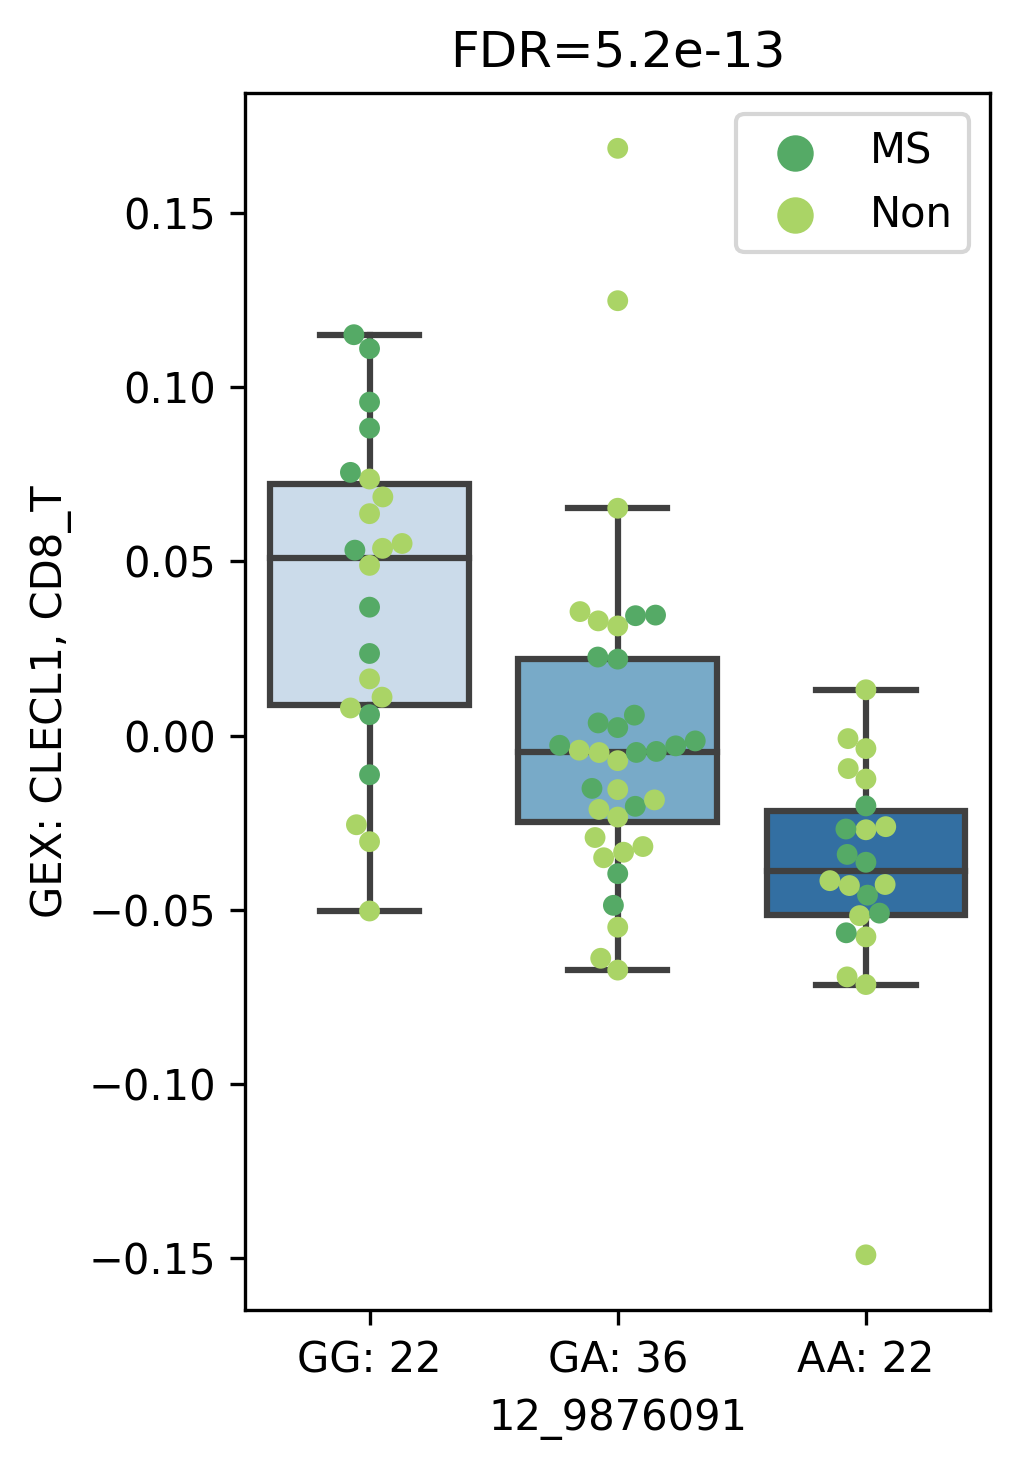

In [21]:
import scqtlib

fig_dir = '/usersdata/yuanhua/msNewData/fromMarc/figures/'

fig = plt.figure(figsize=(3.5, 5), dpi=300)
scqtlib.plots.Gboxplot(df_tmp.GT, df_tmp.GEX, 
                       SNP_name=_snp_id_full,
                       dot_hue=df_tmp['isMS'].values)
plt.ylabel('GEX: %s, %s' %(_gene, _cell))
plt.xlabel(_snp_id)
plt.title('FDR=%.1e' %_fdr)
plt.tight_layout()
# plt.savefig(fig_dir + 'eQTL.%s.%s.pdf' %(_gene, _cell))

plt.show()